# Bước 1: Import thư viện

In [39]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import math
import datetime as dt
import matplotlib.pyplot as plt #vẽ biểu đồ
import seaborn as sb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.models import load_model #tải mô hình

# Các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất

# Kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Bước 2: Đọc dữ liệu

In [40]:
# # # Tạo quyền truy cập với google drive
# from google.colab import drive
# drive.mount('/content/drive')


In [41]:
# đọc dữ liệu từ file csv
df = pd.read_csv('Du lieu Lich su VNM 2013_2023.csv')
df

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất,KL,% Thay đổi
0,21/07/2023,"73,500.0","72,500.0","75,000.0","72,400.0",3.12M,1.10%
1,20/07/2023,"72,700.0","72,600.0","72,900.0","72,300.0",2.45M,0.14%
2,19/07/2023,"72,600.0","72,500.0","73,000.0","72,400.0",2.95M,0.28%
3,18/07/2023,"72,400.0","72,500.0","72,600.0","72,200.0",2.93M,0.14%
4,17/07/2023,"72,300.0","73,000.0","73,600.0","72,200.0",3.92M,-1.36%
...,...,...,...,...,...,...,...
2500,16/07/2013,"96,528.0","95,139.0","97,222.0","95,139.0",729.69K,1.46%
2501,15/07/2013,"95,139.0","95,139.0","95,833.0","94,444.0",176.98K,0.00%
2502,12/07/2013,"95,139.0","94,444.0","95,139.0","93,750.0",220.82K,0.74%
2503,11/07/2013,"94,444.0","94,444.0","95,139.0","93,750.0",161.84K,0.00%


In [42]:
df

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất,KL,% Thay đổi
0,21/07/2023,"73,500.0","72,500.0","75,000.0","72,400.0",3.12M,1.10%
1,20/07/2023,"72,700.0","72,600.0","72,900.0","72,300.0",2.45M,0.14%
2,19/07/2023,"72,600.0","72,500.0","73,000.0","72,400.0",2.95M,0.28%
3,18/07/2023,"72,400.0","72,500.0","72,600.0","72,200.0",2.93M,0.14%
4,17/07/2023,"72,300.0","73,000.0","73,600.0","72,200.0",3.92M,-1.36%
...,...,...,...,...,...,...,...
2500,16/07/2013,"96,528.0","95,139.0","97,222.0","95,139.0",729.69K,1.46%
2501,15/07/2013,"95,139.0","95,139.0","95,833.0","94,444.0",176.98K,0.00%
2502,12/07/2013,"95,139.0","94,444.0","95,139.0","93,750.0",220.82K,0.74%
2503,11/07/2013,"94,444.0","94,444.0","95,139.0","93,750.0",161.84K,0.00%


In [43]:
# Xóa hai dòng "KL" và "Thay đổi %" từ DataFrame dataSet
df = df.drop(columns=["KL", "% Thay đổi"])

In [44]:
# Hiển thị lại DataFrame sau khi xóa

df

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất
0,21/07/2023,"73,500.0","72,500.0","75,000.0","72,400.0"
1,20/07/2023,"72,700.0","72,600.0","72,900.0","72,300.0"
2,19/07/2023,"72,600.0","72,500.0","73,000.0","72,400.0"
3,18/07/2023,"72,400.0","72,500.0","72,600.0","72,200.0"
4,17/07/2023,"72,300.0","73,000.0","73,600.0","72,200.0"
...,...,...,...,...,...
2500,16/07/2013,"96,528.0","95,139.0","97,222.0","95,139.0"
2501,15/07/2013,"95,139.0","95,139.0","95,833.0","94,444.0"
2502,12/07/2013,"95,139.0","94,444.0","95,139.0","93,750.0"
2503,11/07/2013,"94,444.0","94,444.0","95,139.0","93,750.0"


# Bước 3: Mô tả dữ liệu

In [45]:
#định dạng cấu trúc thời gian
df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [46]:
#kích thước dữ liệu
df.shape

(2505, 5)

In [47]:
#dữ liệu 5 dòng đầu
df.head()

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất
0,2023-07-21,"73,500.0","72,500.0","75,000.0","72,400.0"
1,2023-07-20,"72,700.0","72,600.0","72,900.0","72,300.0"
2,2023-07-19,"72,600.0","72,500.0","73,000.0","72,400.0"
3,2023-07-18,"72,400.0","72,500.0","72,600.0","72,200.0"
4,2023-07-17,"72,300.0","73,000.0","73,600.0","72,200.0"


In [48]:
#xác định kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ngày       2505 non-null   datetime64[ns]
 1   Đóng cửa   2505 non-null   object        
 2   Mở cửa     2505 non-null   object        
 3   Cao nhất   2505 non-null   object        
 4   Thấp nhất  2505 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 98.0+ KB


In [49]:
# Xem khoảng thời gian của bộ dữ liệu
print("Ngày đầu tiên trong bộ dữ liệu: ", df.iloc[-1][0])
print("Ngày cuối cùng trong bộ dữ liệu: ",df.iloc[0][0])
print("Khoảng thời gian: ", df.iloc[0][0]-df.iloc[-1][0])

Ngày đầu tiên trong bộ dữ liệu:  2013-07-10 00:00:00
Ngày cuối cùng trong bộ dữ liệu:  2023-07-21 00:00:00
Khoảng thời gian:  3663 days 00:00:00


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29716\835474774.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Ngày đầu tiên trong bộ dữ liệu: ", df.iloc[-1][0])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29716\835474774.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Ngày cuối cùng trong bộ dữ liệu: ",df.iloc[0][0])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29716\835474774.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `se

In [50]:
#mô tả bộ dữ liệu
df.describe()

,Ngày
count,2505
mean,2018-07-17 16:17:14.730539008
min,2013-07-10 00:00:00
25%,2016-01-13 00:00:00
50%,2018-07-19 00:00:00
75%,2021-01-14 00:00:00
max,2023-07-21 00:00:00


# Bước 4: Tiền xử lý dữ liệu

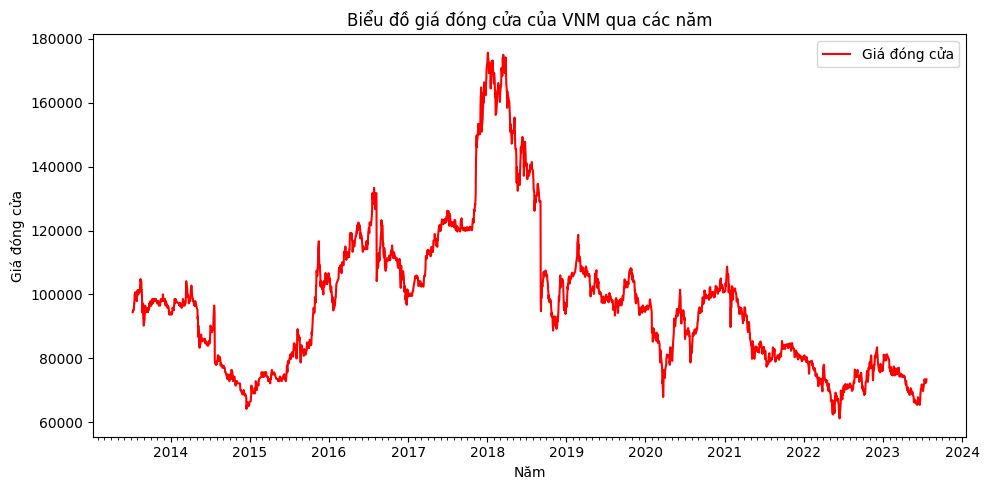

In [51]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi

# Chuyển đổi cột "Ngày" sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Đóng cửa'] = df['Đóng cửa'].str.replace(',', '').astype(float)
df['Mở cửa'] = df['Mở cửa'].str.replace(',', '').astype(float)
df['Cao nhất'] = df['Cao nhất'].str.replace(',', '').astype(float)
df['Thấp nhất'] = df['Thấp nhất'].str.replace(',', '').astype(float)

# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của VNM qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29716\4171228357.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29716\4171228357.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29716\4171228357.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hist

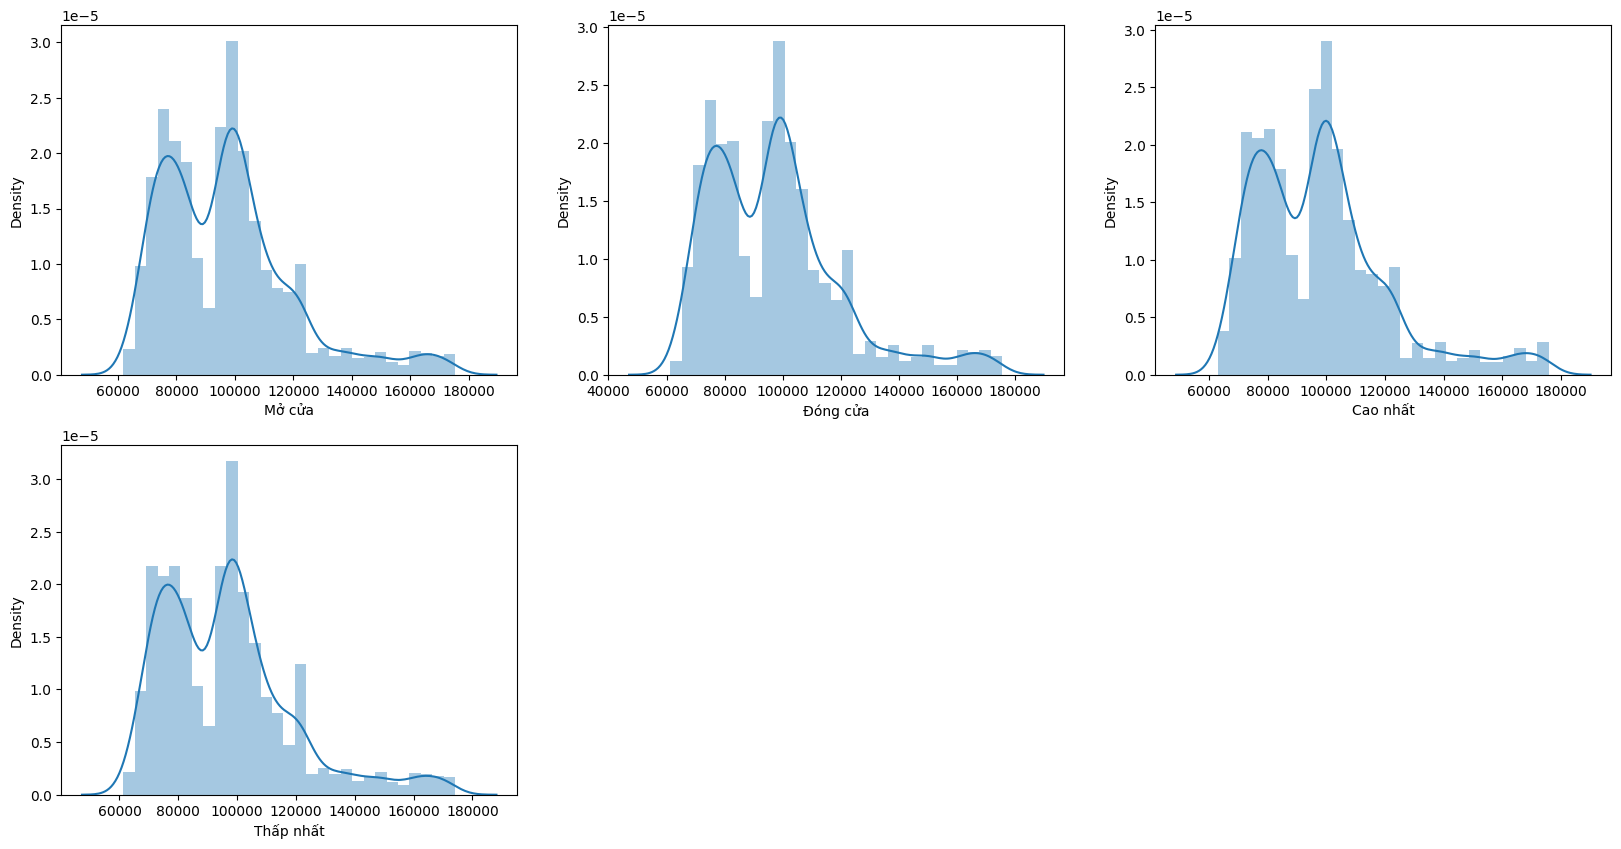

In [52]:
features = ['Mở cửa', 'Đóng cửa', 'Cao nhất', 'Thấp nhất']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

Trong biểu đồ phân phối dữ liệu OHLC, chúng ta có thể thấy hai đỉnh có nghĩa là dữ liệu đã thay đổi đáng kể ở hai vùng. Và dữ liệu có xu hướng bị lệch trái.

In [53]:
df1 = pd.DataFrame(df,columns=['Ngày','Đóng cửa'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1.head()

,Đóng cửa
Ngày,
2013-07-10,94444.0
2013-07-11,94444.0
2013-07-12,95139.0
2013-07-15,95139.0
2013-07-16,96528.0


## Chia tập dữ liệu

In [54]:
# # đưa dữ liệu về dạng mảng
# data = df1.values

# # train_data = data[:1500]
# # test_data = data[1500:]

# # Tạo split tỉ lệ 80%/20%
# split = int(0.8*len(data))

# # Chia thành train và test set
# train_data, test_data= data[:split], data[split:]

In [55]:
# train_data.shape, test_data.shape

In [56]:
df1.head()

,Đóng cửa
Ngày,
2013-07-10,94444.0
2013-07-11,94444.0
2013-07-12,95139.0
2013-07-15,95139.0
2013-07-16,96528.0


In [57]:

data = df1['Đóng cửa']

# using the train test split function
train_data, test_data = train_test_split(data ,
								random_state=104,
								test_size=0.2,
								shuffle=True)

# printing out train and test sets

print('data_train : ')
print(train_data.head())
print(train_data.shape)
print('')
print('data_test : ')
print(test_data.head())
print(test_data.shape)
print('')


data_train : 
Ngày
2017-07-21    121308.0
2022-04-18     73132.2
2019-11-07    103923.0
2014-06-02     86111.0
2016-12-15    100793.0
Name: Đóng cửa, dtype: float64
(2004,)

data_test : 
Ngày
2022-10-14     72700.1
2018-12-21     95091.0
2013-08-15    104861.0
2014-08-28     77083.0
2015-12-28    105833.0
Name: Đóng cửa, dtype: float64
(501,)



In [58]:
# #chia tập dữ liệu
# data = df1.values
# train_data = data[:1500]
# test_data = data[1500:]

In [59]:
#train_data.shape, test_data.shape

## Chuẩn hóa dữ liệu

In [60]:
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(df1.values)

## Tạo tập x_train và y_train

In [61]:
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0]) # giá đóng cửa 50 ngày cuối cùng trong tệp dữ liệu
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau

In [62]:
x_train #x_train là một chuỗi các giá trị đóng cửa liên tiếp trong quá khứ.

[array([0.29027738, 0.29027738, 0.29635691, 0.29635691, 0.30850724,
        0.31457803, 0.31457803, 0.33887869, 0.34494948, 0.34494948,
        0.32672836, 0.33279915, 0.33887869, 0.32065757, 0.32672836,
        0.34494948, 0.34494948, 0.35102902, 0.33887869, 0.35102902,
        0.34494948, 0.34494948, 0.34494948, 0.34494948, 0.35709981,
        0.36925013, 0.38140046, 0.37532967, 0.37532967, 0.35102902,
        0.35102902, 0.33279915, 0.29027738, 0.31457803, 0.30850724,
        0.27205626, 0.26598547, 0.25383514, 0.27205626, 0.29027738,
        0.30850724, 0.30850724, 0.29027738, 0.3024277 , 0.3024277 ,
        0.29635691, 0.3024277 , 0.29635691, 0.29635691, 0.29027738]),
 array([0.29027738, 0.29635691, 0.29635691, 0.30850724, 0.31457803,
        0.31457803, 0.33887869, 0.34494948, 0.34494948, 0.32672836,
        0.33279915, 0.33887869, 0.32065757, 0.32672836, 0.34494948,
        0.34494948, 0.35102902, 0.33887869, 0.35102902, 0.34494948,
        0.34494948, 0.34494948, 0.34494948, 0.

In [63]:
y_train #y_train chứa giá trị đóng cửa  tiếp theo mà mô hình dự đoán.

[0.2963569134842401,
 0.30242770379791795,
 0.2963569134842401,
 0.30242770379791795,
 0.3145780319617488,
 0.30850724164807086,
 0.3145780319617488,
 0.32065756981190174,
 0.30850724164807086,
 0.3145780319617488,
 0.30850724164807086,
 0.3145780319617488,
 0.3145780319617488,
 0.3145780319617488,
 0.3267283601255797,
 0.3145780319617488,
 0.3145780319617488,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.32065756981190174,
 0.3145780319617488,
 0.3145780319617488,
 0.3145780319617488,
 0.32065756981190174,
 0.32065756981190174,
 0.3145780319617488,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.32065756

In [64]:
#xếp dữ liệu thành 1 mảng 2 chiều
x_train = np.array(x_train)
y_train = np.array(y_train)

In [65]:
#xếp lại dữ liệu thành mảng 1 chiều
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

# Bước 5: Xây dựng và huấn luyện mô hình

## 5.1.MÔ HÌNH RNN

### Xây dựng mô hình RNN

In [66]:
regressor = Sequential()

# Lớp thứ nhất của RNN
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh", # Hàm kích hoạt được sử dụng là tanh
              return_sequences = True, # Layer này sẽ trả về chuỗi đầu ra cho mỗi bước trong chuỗi đầu vào.
              input_shape = (x_train.shape[1],1))
              # Xác định kích thước của đầu vào. Trong trường hợp này, đầu vào có kích thước là (số lượng bước thời gian, số chiều của mỗi bước thời gian), với số chiều là 1.
             )

regressor.add(
    Dropout(0.2)
             )

# Lớp thứ hai RNN
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# Lớp thứ ba RNN
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# Lớp thứ tư RNN
regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# Thêm lớp đầu ra
regressor.add(Dense(units = 1))

# Đo sai số giá trị trung bình của bình phương chênh lệch giữa dự đoán và giá trị thực tế, có sử dụng trình tối ưu hóa adam
regressor.compile(
    optimizer = "adam",
    loss = "mse",
    metrics = ["accuracy"])

### Huấn luyện dữ liệu

In [67]:
save_rnn_model = "save_model.hdf5"
best_rnn_model = ModelCheckpoint(save_rnn_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
history = regressor.fit(x_train,y_train,epochs=20,batch_size=50,verbose=2,callbacks=[best_rnn_model])

Epoch 1/20

Epoch 1: loss improved from inf to 0.42518, saving model to save_model.hdf5
40/40 - 13s - loss: 0.4252 - accuracy: 5.1177e-04 - 13s/epoch - 324ms/step
Epoch 2/20


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.42518 to 0.20627, saving model to save_model.hdf5
40/40 - 1s - loss: 0.2063 - accuracy: 0.0000e+00 - 1s/epoch - 34ms/step
Epoch 3/20

Epoch 3: loss improved from 0.20627 to 0.16469, saving model to save_model.hdf5
40/40 - 1s - loss: 0.1647 - accuracy: 5.1177e-04 - 1s/epoch - 33ms/step
Epoch 4/20

Epoch 4: loss improved from 0.16469 to 0.11722, saving model to save_model.hdf5
40/40 - 1s - loss: 0.1172 - accuracy: 5.1177e-04 - 1s/epoch - 34ms/step
Epoch 5/20

Epoch 5: loss improved from 0.11722 to 0.09115, saving model to save_model.hdf5
40/40 - 1s - loss: 0.0911 - accuracy: 0.0000e+00 - 1s/epoch - 37ms/step
Epoch 6/20

Epoch 6: loss improved from 0.09115 to 0.07877, saving model to save_model.hdf5
40/40 - 2s - loss: 0.0788 - accuracy: 0.0000e+00 - 2s/epoch - 38ms/step
Epoch 7/20

Epoch 7: loss improved from 0.07877 to 0.06116, saving model to save_model.hdf5
40/40 - 1s - loss: 0.0612 - accuracy: 5.1177e-04 - 1s/epoch - 34ms/step
Epoch 8/20

Epoch 8: loss i

#Kiểm tra và sử dụng mô hình


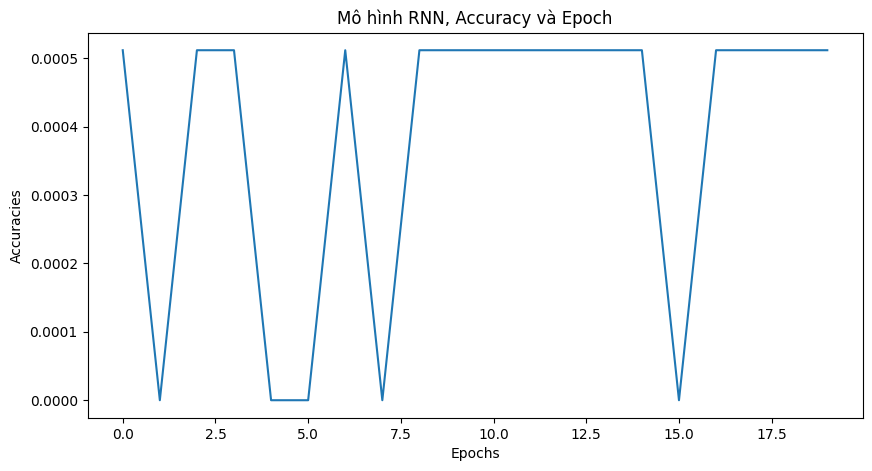

In [68]:
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
#Accuracy là tỉ lệ phần trăm của số lượng dự đoán đúng trên tổng số dự đoán. Nó là một phép đo quan trọng để đánh giá hiệu suất của mô hình trên dữ liệu.
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Mô hình RNN, Accuracy và Epoch")
plt.show()

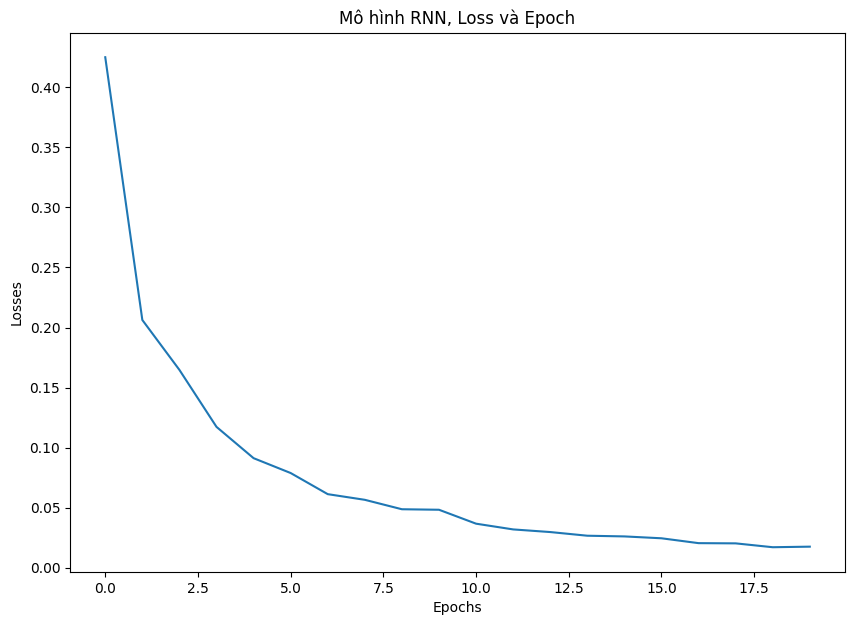

In [69]:
#Mô hình chỉ số loss
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
#Loss là một số đo đánh giá mức độ sai lệch giữa giá trị dự đoán của mô hình và giá trị thực tế
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Mô hình RNN, Loss và Epoch")
plt.show()


In [70]:
#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model("save_model.hdf5")
rnn_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
rnn_train_predict = sc.inverse_transform(rnn_train_predict) #giá dự đoán

62/62 [==============================] - 4s 7ms/step


In [71]:
#xử lý dữ liệu test
test_rnn = df1[len(train_data)-50:].values
test_rnn = test_rnn.reshape(-1,1)
rnn_sc_test = sc.transform(test_rnn)

x_test_rnn = []
for i in range(50,test_rnn.shape[0]):
  x_test_rnn.append(rnn_sc_test[i-50:i,0])
x_test_rnn = np.array(x_test_rnn)
x_test_rnn = np.reshape(x_test_rnn,(x_test_rnn.shape[0],x_test_rnn.shape[1],1))

#dữ liệu test
y_test_rnn = data[1954:] #giá thực
y_test_predict_rnn = final_model.predict(x_test_rnn)
y_test_predict_rnn = sc.inverse_transform(y_test_predict_rnn) #giá dự đoán

# Kiểm tra và cắt bớt mẫu
min_length = min(len(y_test_rnn), len(y_test_predict_rnn))
y_test_rnn = y_test_rnn[:min_length]
y_test_predict_rnn = y_test_predict_rnn[:min_length]


16/16 [==============================] - 3s 7ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29716\350749424.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_rnn['Dự đoán'] = rnn_train_predict #thêm dữ liệu
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29716\350749424.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_rnn['Dự đoán'] = y_test_predict_rnn #thêm dữ liệu


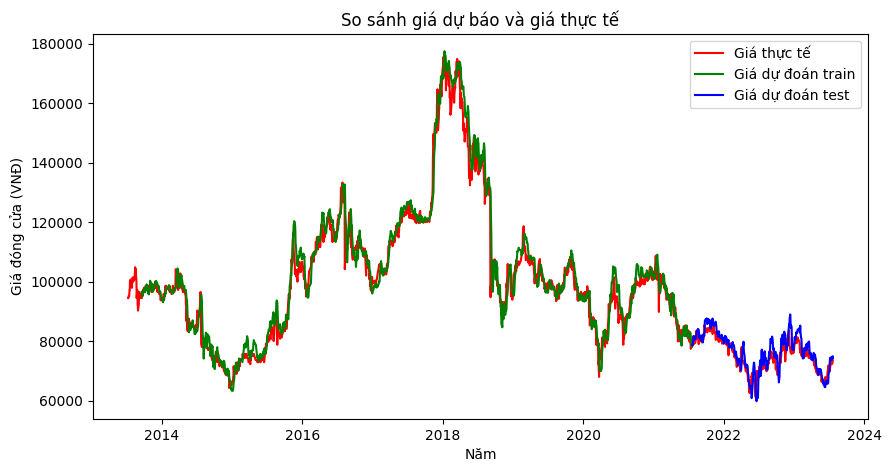

In [72]:
#lập biểu đồ so sánh
train_data_rnn = df1[50:2004]
test_data_rnn = df1[2004:]

plt.figure(figsize=(10,5))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data_rnn['Dự đoán'] = rnn_train_predict #thêm dữ liệu
plt.plot(train_data_rnn['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data_rnn['Dự đoán'] = y_test_predict_rnn #thêm dữ liệu
plt.plot(test_data_rnn['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Năm') #đặt tên hàm x
plt.ylabel('Giá đóng cửa (VNĐ)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [73]:
# Các chỉ số đánh giá sự hiệu quả trong dự đoán của mô hình dựa trên tập train

print('Độ phù hợp tập train:',r2_score(y_train,rnn_train_predict))

print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,rnn_train_predict))

print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,rnn_train_predict))

Độ phù hợp tập train: 0.9645021599350447
Sai số tuyệt đối trung bình trên tập train (VNĐ): 2866.5361542029173
Phần trăm sai số tuyệt đối trung bình tập train: 0.0281048116507709


In [74]:
# Bảng giá dự đoán dựa trên tập train
train_data_rnn

,Đóng cửa,Dự đoán
Ngày,,
2013-09-19,95139.0,96574.710938
2013-09-20,95833.0,94993.554688
2013-09-23,95139.0,95850.296875
2013-09-24,95833.0,96545.992188
2013-09-25,97222.0,95997.039062
...,...,...
2021-07-14,78054.9,79904.484375
2021-07-15,78238.5,80429.015625
2021-07-16,78881.3,79274.312500


In [75]:
# Các chỉ số đánh giá sự hiệu quả trong dự đoán của mô hình dựa trên tập test

#r2
print('Độ phù hợp tập test:',r2_score(y_test_predict_rnn, y_test_rnn))

#mae
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):',mean_absolute_error(y_test_rnn,y_test_predict_rnn))

#mape
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(y_test_rnn,y_test_predict_rnn))

Độ phù hợp tập test: -0.03139689873758833
Sai số tuyệt đối trung bình trên tập test (VNĐ): 5332.369030688622
Phần trăm sai số tuyệt đối trung bình tập test: 0.07151689586278806


In [76]:
# Bảng giá dự đoán dựa trên tập test
test_data_rnn

,Đóng cửa,Dự đoán
Ngày,,
2021-07-21,78330.4,78638.296875
2021-07-22,79707.8,78641.585938
2021-07-23,80442.4,78806.546875
2021-07-26,81636.2,80467.382812
2021-07-27,80350.6,81320.648438
...,...,...
2023-07-17,72300.0,73878.281250
2023-07-18,72400.0,74563.906250
2023-07-19,72600.0,74469.468750
